In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Titanic-Dataset.csv'
rawData=pd.read_csv(file_path)

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#seperating integer datatype from non integer datatype
rawData_int=rawData[['Age','SibSp','Parch','Fare']]
rawData_other=rawData[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
# fullData['Survived']=np.nan
allData=rawData
rawData['train_test']=1

In [6]:
rawData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [7]:
allData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


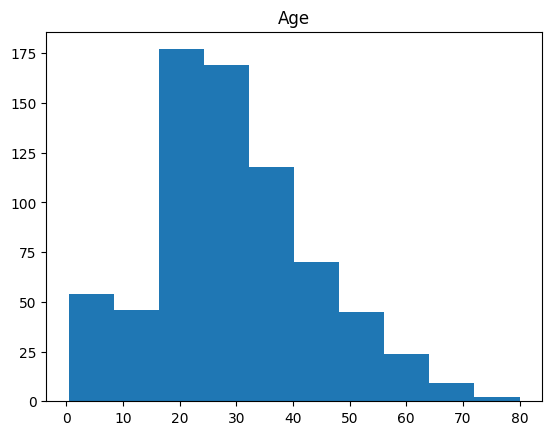

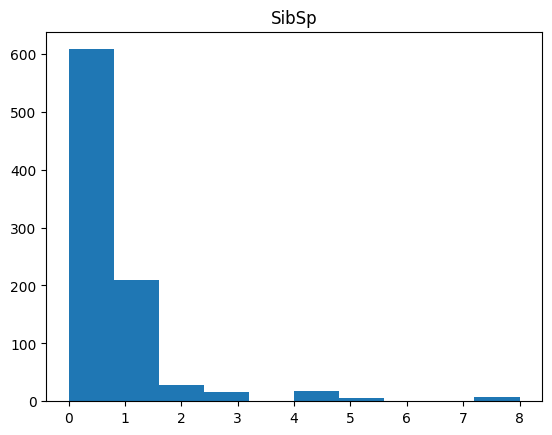

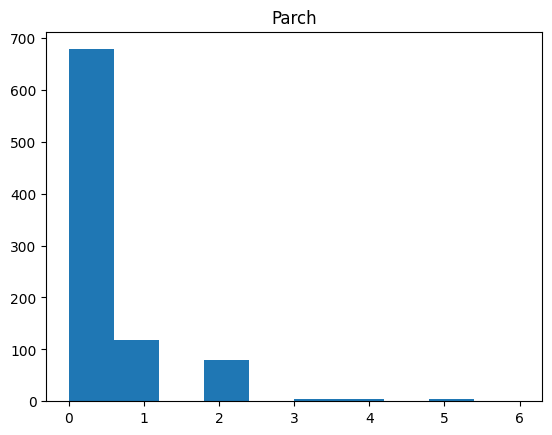

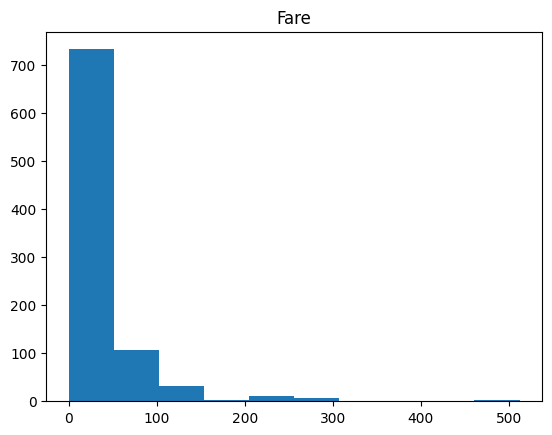

In [8]:
for i in rawData_int.columns:
  plt.hist(rawData[i])
  plt.title(i)
  plt.show()

In [9]:
rawData_int.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<Axes: >

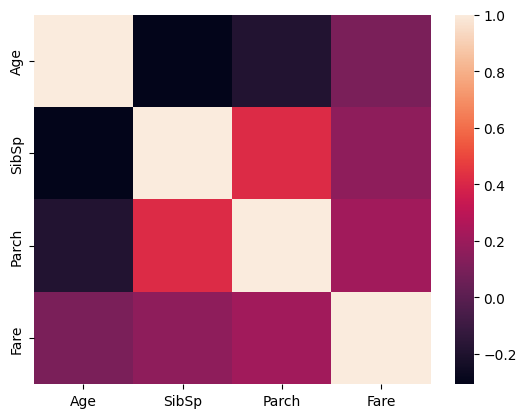

In [10]:
sns.heatmap(rawData_int.corr())
#Here the colours describe the level of correlation, darker colour like purple resemble negative correlation and brighter colours like skin resemble positive correlation

In [11]:
pd.pivot_table(rawData,index='Survived',values=rawData_int.columns)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


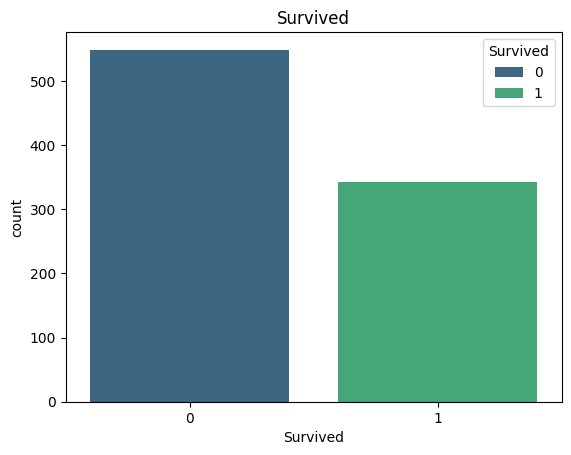

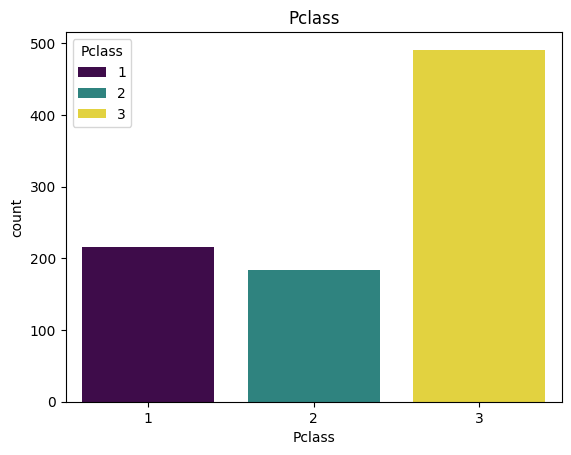

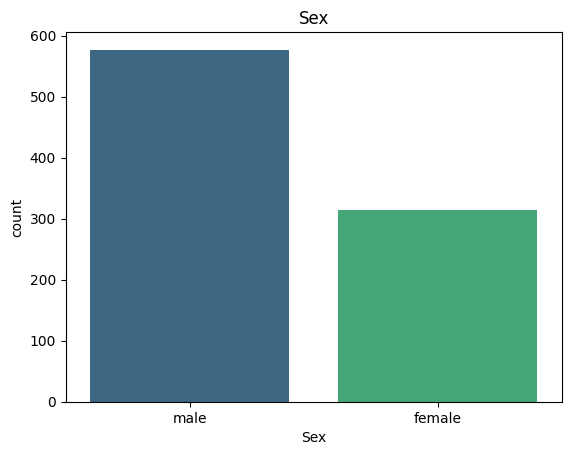

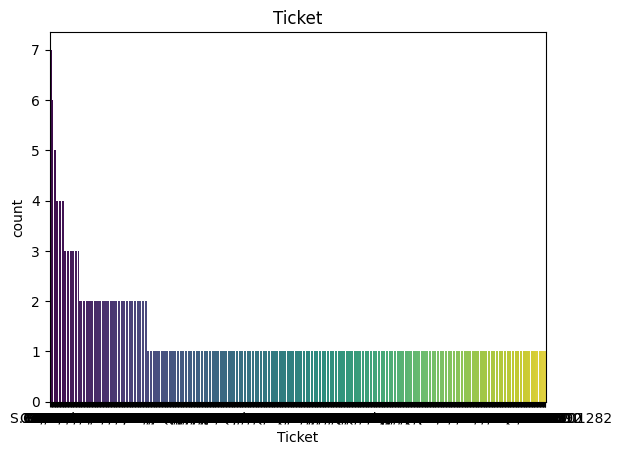

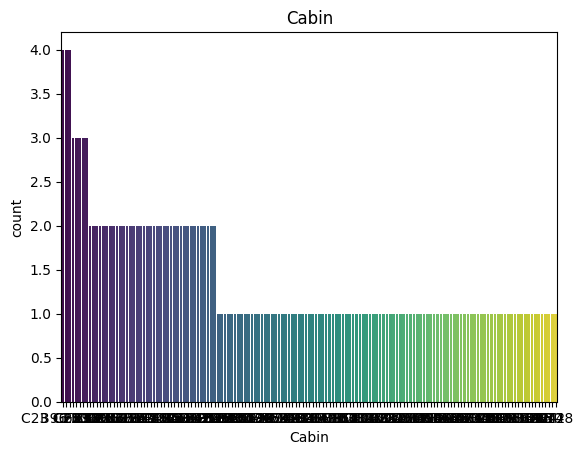

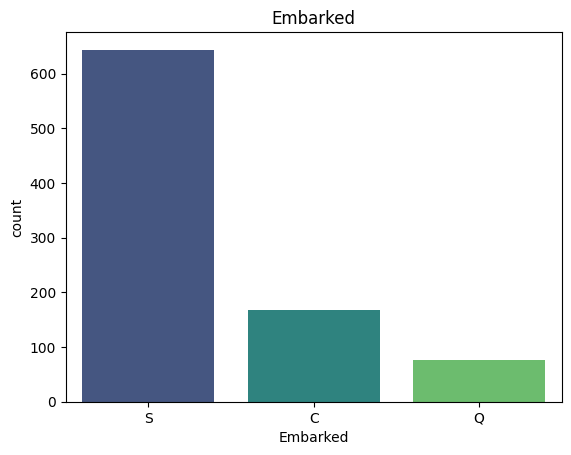

In [12]:
for i in rawData_other.columns:
  sns.barplot(x=rawData_other[i].value_counts().index, y=rawData_other[i].value_counts(), hue=rawData_other[i].value_counts().index, palette='viridis').set_title(i)
  plt.show()

In [13]:
#comparing survival of different variables

column=['Sex','Embarked','Pclass']
for i in column:
  print(pd.pivot_table(rawData,index="Survived",columns=i,values='Ticket',aggfunc='count'))
  print('\n')

Sex       female  male
Survived              
0             81   468
1            233   109


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119




In [14]:
rawData['Cabin_Multiple']=rawData.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
rawData['Cabin_Multiple'].value_counts()

,count
Cabin_Multiple,
0,687
1,180
2,16
3,6
4,2


In [15]:
pd.pivot_table(rawData,index='Survived',values='Ticket',columns='Cabin_Multiple',aggfunc='count')

Cabin_Multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [16]:
#creating a category based on cabin letter
rawData['Cabin_letter']=rawData.Cabin.apply(lambda x: str(x)[0])

In [17]:
pd.pivot_table(rawData,index="Survived",columns='Cabin_letter',values="Ticket",aggfunc='count')

Cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [18]:
rawData['Numeric_tickets']=rawData.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
rawData['Numeric_tickets'].value_counts()

,count
Numeric_tickets,
1,661
0,230


In [19]:
pd.pivot_table(rawData,index='Survived',columns='Numeric_tickets',values='Ticket',aggfunc='count')

Numeric_tickets,0,1
Survived,,
0,142,407
1,88,254


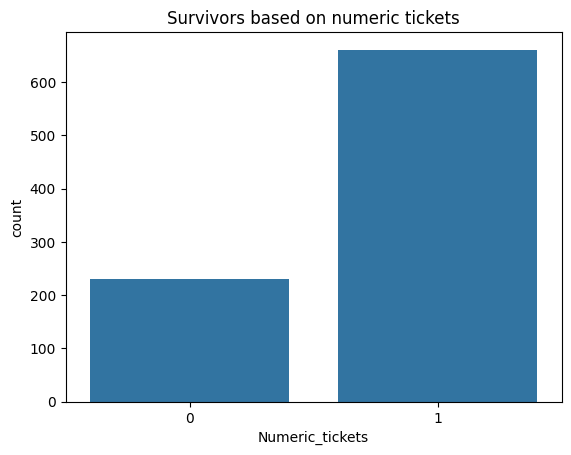

In [20]:
sns.barplot(x=rawData['Numeric_tickets'].value_counts().index,y=rawData['Numeric_tickets'].value_counts()).set_title("Survivors based on numeric tickets")
plt.show()

In [21]:
rawData['name_title']=rawData.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
rawData['name_title'].value_counts()

,count
name_title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [22]:
allData['Cabin_Multiple']=allData.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
allData['Cabin_letter']=allData.Cabin.apply(lambda x: str(x)[0])
allData['Numeric_tickets']=allData.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
allData['Ticket_letter']=allData.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('/','').replace('.','').lower() if(len(x.split(' ')[:-1]))>0 else 0)
allData['Name_Title']=allData.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
allData['Age']=allData['Age'].fillna(rawData.Age.median())
allData['Fare']=allData['Fare'].fillna(rawData.Fare.median())
allData = allData.dropna(subset=['Embarked'])

/tmp/ipython-input-2988932897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allData['Normalise_sibsp']=np.log(allData.SibSp+1)
/tmp/ipython-input-2988932897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allData['Normalize_fare']=np.log(allData.Fare+1)


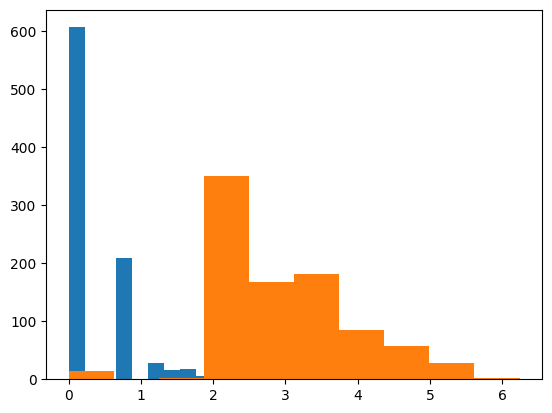

In [23]:
allData['Normalise_sibsp']=np.log(allData.SibSp+1)
allData['Normalize_fare']=np.log(allData.Fare+1)
plt.hist(allData['Normalise_sibsp'])
plt.hist(allData['Normalize_fare'])
plt.show()

allData.info()

In [24]:
allData.Pclass=allData.Pclass.astype(str)
allDummies=pd.get_dummies(allData[['Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'Cabin_Multiple',
       'Cabin_letter', 'Numeric_tickets', 'Ticket_letter', 'Name_Title',
       'Normalise_sibsp', 'Normalize_fare', 'train_test', 'Survived']])

X_train=allDummies[allDummies.train_test==1].drop(['train_test', 'Survived'],axis=1)
X_test=allDummies[allDummies.train_test==0].drop(['train_test', 'Survived'],axis=1)

Y_train=allDummies[allDummies.train_test==1].Survived

/tmp/ipython-input-1189964869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allData.Pclass=allData.Pclass.astype(str)


In [25]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
allDummies_scaled=allDummies.copy()
allDummies_scaled[['Age','SibSp','Parch','Normalize_fare']]=scale.fit_transform(allDummies_scaled[['Age','SibSp','Parch','Normalize_fare']])
X_train_scaled=allDummies_scaled[allDummies_scaled.train_test==1].drop(['train_test', 'Survived'],axis=1)
X_test_scaled=allDummies_scaled[allDummies_scaled.train_test==0].drop(['train_test', 'Survived'],axis=1)

Y_train=allDummies_scaled[allDummies_scaled.train_test==1].Survived

Just an examples of why we need to normalize the **data**

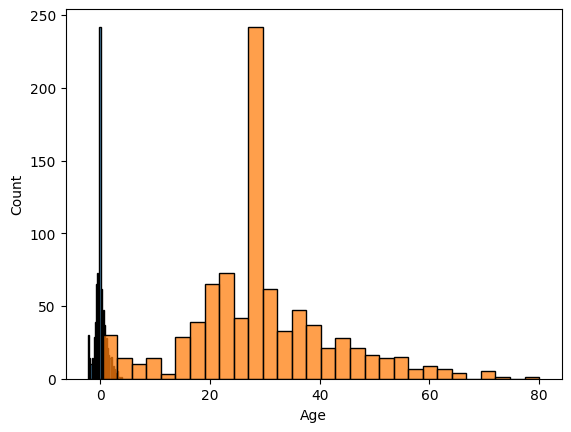

In [26]:
sns.histplot(allDummies_scaled['Age'])
sns.histplot(allData['Age'])
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:
gnb=GaussianNB()
cv=cross_val_score(gnb,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.47191011 0.4494382  0.41573034 0.42696629 0.4519774 ]
0.44320446899003363


In [29]:
lr=LogisticRegression(max_iter=2000)
cv=cross_val_score(lr,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.8258427  0.78089888 0.81460674 0.85875706]
0.8211896146765696


In [30]:
lr=LogisticRegression(max_iter=2000)
cv=cross_val_score(lr,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.8258427  0.78089888 0.81460674 0.85310734]
0.8200596711737447


In [31]:
knn=KNeighborsClassifier()
cv=cross_val_score(knn,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.78651685 0.7752809  0.82022472 0.82485876]
0.7953088300641147


In [32]:
knn=KNeighborsClassifier()
cv=cross_val_score(knn,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.78651685 0.78089888 0.83707865 0.82022472 0.84745763]
0.8144353456484479


In [33]:
rf=RandomForestClassifier(random_state=7)
cv=cross_val_score(rf,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.79775281 0.84269663 0.74157303 0.82485876]
0.8065447851202945


In [34]:
rf=RandomForestClassifier(random_state=7)
cv=cross_val_score(rf,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.79775281 0.84269663 0.74157303 0.83050847]
0.8065511331175014


In [35]:
svc=SVC(probability=True)
cv=cross_val_score(svc,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
0.8324319177299563


In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =7)
cv = cross_val_score(xgb,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.87078652 0.80898876 0.81920904]
0.8256395607185933


In [37]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('gnb',gnb),('xgb',xgb),('svc',svc),('rf',rf)],voting='soft')

In [38]:
cv=cross_val_score(voting_clf,X_train_scaled,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.84269663 0.79775281 0.81460674 0.80898876 0.86440678]
0.8256903446962485


In [59]:
X_test=X_train

In [40]:
voting_clf.fit(X_train_scaled,Y_train)
y_hat_base_vc = voting_clf.predict(X_test).astype(int)
basic_submission = {'PassengerId': allData.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

In [41]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [42]:
def clf_performance(classifier,model_name):
  print(model_name)
  print('Best Score: ' + str(classifier.best_score_))
  print('Best Parameters: ' + str(classifier.best_params_))

In [43]:
lr=LogisticRegression()
parameter_grid={
    'max_iter':[2000],
    'penalty':['l1','l2'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}
clf_lr=GridSearchCV(lr,param_grid=parameter_grid,cv=5,verbose=True,n_jobs=-1)
best_clf_lr=clf_lr.fit(X_train_scaled,Y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8234495016822192
Best Parameters: {'C': np.float64(1.623776739188721), 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [44]:
knn=KNeighborsClassifier()
parameter_grid={
    'n_neighbors' : [3,5,7,9,11,13],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree','kd_tree'],
    'p' : [1,2]
}
clf_knn=GridSearchCV(knn,param_grid=parameter_grid,cv=5,verbose=True,n_jobs=-1)
best_clf_knn=clf_knn.fit(X_train_scaled,Y_train)
clf_performance(best_clf_knn,'K Neighbours')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
K Neighbours
Best Score: 0.8245350092045959
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [49]:
rf=RandomForestClassifier(random_state=7)
parameter_grid =  {
    'n_estimators': [400,450,500,550],
    'criterion':['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [15, 20, 25],
    'max_features': ['sqrt', 10],
    'min_samples_leaf': [2,3],
    'min_samples_split': [2,3]
    }
clf_rf=RandomizedSearchCV(rf,param_distributions=parameter_grid,cv=5,verbose=True,n_jobs=-1)
best_clf_rf=clf_rf.fit(X_train_scaled,Y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest
Best Score: 0.8290547832158953
Best Parameters: {'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 10, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}


In [50]:
best_lr=best_clf_lr.best_estimator_
best_knn=best_clf_knn.best_estimator_
best_rf=best_clf_rf.best_estimator_
voting_clf_soft=VotingClassifier(estimators=[('knn',best_knn),('lr',best_lr),('rf',best_rf)],voting='soft')
voting_clf_hard=VotingClassifier(estimators=[('knn',best_knn),('lr',best_lr),('rf',best_rf)],voting='hard')

print('Voting Soft: ',cross_val_score(voting_clf_soft,X_train,Y_train,cv=5))
print('Voting Soft: ',cross_val_score(voting_clf_soft,X_train,Y_train,cv=5).mean())

print('Voting hard: ',cross_val_score(voting_clf_hard,X_train,Y_train,cv=5))
print('Voting hard: ',cross_val_score(voting_clf_hard,X_train,Y_train,cv=5).mean())

Voting Soft:  [0.84269663 0.83146067 0.82022472 0.80898876 0.89265537]
Voting Soft:  0.8392052307496984
Voting hard:  [0.83707865 0.80898876 0.83707865 0.79775281 0.85310734]
Voting hard:  0.8268012442074525


In [51]:
param={
    'weights':[[1,1,1],[1,1,2],[1,2,1],[2,1,1],[2,2,1],[2,1,2],[1,2,2]]
}
vote_weight=GridSearchCV(voting_clf_soft,param_grid=param,cv=5,verbose=True,n_jobs=-1)
best_clf_weight=vote_weight.fit(X_train_scaled,Y_train)
clf_performance(best_clf_weight,'Weight Soft VC')
voting_clf_sub=best_clf_weight.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Weight Soft VC
Best Score: 0.8301910747159271
Best Parameters: {'weights': [1, 2, 2]}


In [62]:
voting_clf_hard.fit(X_train_scaled,Y_train)
voting_clf_soft.fit(X_train_scaled,Y_train)

y_hat_vc_soft=voting_clf_soft.predict(X_test).astype(int)
y_hat_vc_hard=voting_clf_hard.predict(X_test).astype(int)
y_hat_weight=voting_clf_sub.predict(X_test).astype(int)

In [69]:
final_data={'Passanger ID':allData.PassengerId, 'Survived':y_hat_vc_hard}
submission=pd.DataFrame(data=final_data)

final_data2={'Passanger ID':allData.PassengerId, 'Survived':y_hat_vc_soft}
submission2=pd.DataFrame(data=final_data2)

final_data3={'Passanger ID':allData.PassengerId, 'Survived':y_hat_weight}
submission3=pd.DataFrame(data=final_data3)

final_data_comp={'Passanger ID': allData.PassengerId,'Survived_vc_hard':y_hat_vc_hard,'Survived_vc_soft':y_hat_vc_soft, 'Survived_weight':y_hat_weight}
comparision=pd.DataFrame(data=final_data_comp)


In [77]:
comparision['diff_soft_hard']=comparision.apply(lambda x:1 if x.Survived_vc_hard!=x.Survived_vc_soft else 0,axis=1)
comparision['diff_soft_weight']=comparision.apply(lambda x:1 if x.Survived_weight!=x.Survived_vc_soft else 0,axis=1)

In [78]:
comparision.diff_soft_hard.value_counts()

,count
diff_soft_hard,
0,880
1,9


In [79]:
comparision.diff_soft_weight.value_counts()

,count
diff_soft_weight,
0,886
1,3


In [72]:
submission.to_csv('submission_hard.csv', index =False)
submission2.to_csv('submission_soft.csv',index=False)
submission3.to_csv('submission_sub.csv', index=False)